# Рубежный контроль №1
## Халимонов А.М. ИУ5-63Б

### Вариант №23

#### Набор данных №7
https://www.kaggle.com/san-francisco/sf-restaurant-scores-lives-standard
#### Задание №3
Для заданного набора данных произведите масштабирование данных (для одного признака) и преобразование категориальных признаков в количественные двумя способами (label encoding, one hot encoding) для одного признака. Какие методы Вы использовали для решения задачи и почему?
#### Для студентов группы ИУ5-63Б,
Для произвольной колонки данных построить график "Ящик с усами (boxplot)".

In [73]:
# подключение библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [74]:
# загрузка набора данных №7
data = pd.read_csv('restaurant-scores-lives-standard.csv', sep=",")

In [5]:
# размер набора данных
data.shape

(53973, 23)

In [16]:
data.head()

,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods (old),Police Districts,Supervisor Districts,Fire Prevention Districts,Zip Codes,Analysis Neighborhoods
0,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,NaN,NaN,NaN,NaN,1.415043e+10,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,97975,BREADBELLY,1408 Clement St,San Francisco,CA,94118,NaN,NaN,NaN,1.415724e+10,...,Routine - Unscheduled,97975_20190725_103124,Inadequately cleaned or sanitized food contact...,Moderate Risk,NaN,NaN,NaN,NaN,NaN,NaN
2,92982,Great Gold Restaurant,3161 24th St.,San Francisco,CA,94110,NaN,NaN,NaN,NaN,...,New Ownership,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,101389,HOMAGE,214 CALIFORNIA ST,San Francisco,CA,94111,NaN,NaN,NaN,1.415488e+10,...,New Construction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,85986,Pronto Pizza,798 Eddy St,San Francisco,CA,94109,NaN,NaN,NaN,NaN,...,New Ownership,85986_20161011_103114,High risk vermin infestation,High Risk,NaN,NaN,NaN,NaN,NaN,NaN


### Масштабирование данных
Для масштабирования будем использовать признак **"inspection_score"** из нашего набора данных. В данной колонке содержится оценка в диапазоне от 0 до 100. Для нашей задачи будем использовать MinMax масштабирование.

In [11]:
# подключение класса MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [66]:
scaler = MinMaxScaler()
scaler_data = scaler.fit_transform(data[['inspection_score']])

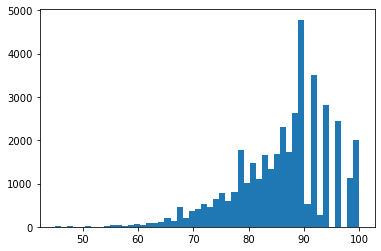

In [17]:
# вывод столбца inspection_score до масштабирования
plt.hist(data['inspection_score'], 50)
plt.show()

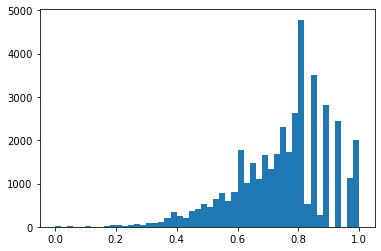

In [124]:
# вывод столбца inspection_score после масштабирования
plt.hist(scaler_data, 50)
plt.show()

В результате произведённого масштабирования диапозон значений столбца "inspection_score" изменился с [0;100] до [0;1]

### Преобразование категориальных признаков в количественные
В качестве категориального признака подойдёт столбец **"risk_category"**, в ктором содержатся всего три значения: "Moderate Risk", "High Risk" и "Low Risk". Чтобы в данном столбце отсутствовали пропуски, заменим их значением "No Risk".

In [75]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [76]:
temp_data = data[['risk_category']]
temp_data['risk_category'].unique()

array([nan, 'Moderate Risk', 'High Risk', 'Low Risk'], dtype=object)

In [137]:
# Импьютация константой
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='No Risk')
imputer_data = imputer.fit_transform(temp_data)
np.unique(imputer_data)

array(['High Risk', 'Low Risk', 'Moderate Risk', 'No Risk'], dtype=object)

### One-hot encoding

In [129]:
oh_encoder = OneHotEncoder()
oh_encoder_data = oh_encoder.fit_transform(imputer_data)

In [130]:
imputer_data[0:10]

array([['No Risk'],
       ['Moderate Risk'],
       ['No Risk'],
       ['No Risk'],
       ['High Risk'],
       ['No Risk'],
       ['No Risk'],
       ['Moderate Risk'],
       ['Moderate Risk'],
       ['No Risk']], dtype=object)

In [138]:
oh_encoder_data.todense()[0:10]

matrix([[0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])

В результате one-hot кодирования мы разбиваем один столбец на четыре. Каждый из полученных столбцов соответствует одному из четырёх значений: "Moderate Risk", "High Risk", "Low Risk" и "No Risk".

### Label encoding

In [132]:
l_encoder = LabelEncoder()
l_encoder_data = l_encoder.fit_transform(imputer_data.ravel())

In [133]:
np.unique(imputer_data)

array(['High Risk', 'Low Risk', 'Moderate Risk', 'No Risk'], dtype=object)

In [134]:
np.unique(l_encoder_data)

array([0, 1, 2, 3])

In [140]:
l_encoder.inverse_transform([0, 1, 2, 3])

array(['High Risk', 'Low Risk', 'Moderate Risk', 'No Risk'], dtype=object)

В результате label кодирования мы заменяем первоначальные строковые значения внутри столбца на соответствующие им целые числа.

### Ящик с усами
Построим "Ящик с усами" для признака **"inspection_score"**, который мы использвали при масштабировании данных.

<AxesSubplot:xlabel='inspection_score'>

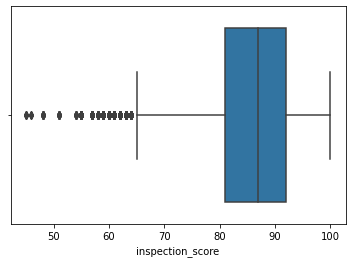

In [68]:
sns.boxplot(x=data['inspection_score'])